# Explore here

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from pickle import dump
from collections import Counter
import imblearn

import streamlit as st

import warnings

In [7]:
import sys
sys.executable

'c:\\Users\\34616\\AppData\\Local\\Programs\\Python\\Python311\\python.exe'

In [8]:
df = pd.read_csv(r"C:\Users\34616\Documents\4GEEKS\datos_gordos\password_strength.csv", sep=",", on_bad_lines='skip') # type: ignore
df.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [9]:
df = df.dropna()

In [10]:
df['strength'].unique()

array([1, 2, 0], dtype=int64)

<Axes: ylabel='strength'>

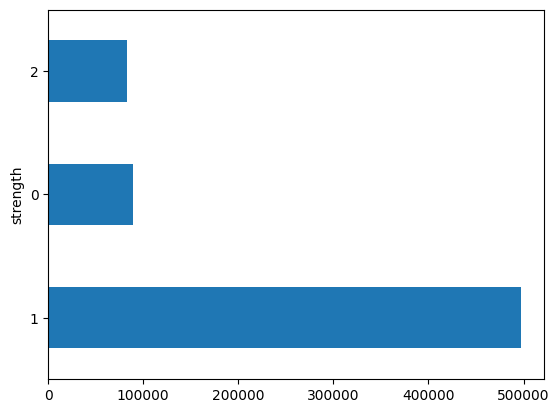

In [11]:
df['strength'].value_counts().plot(kind='barh')

In [12]:
def word(password):
    character=[]
    for i in password:
        character.append(i)
    return character

X = np.array(df["password"])
y = np.array(df["strength"])

tfidf = TfidfVectorizer(tokenizer=word, lowercase=False, token_pattern=None)

X = tfidf.fit_transform(X)

In [13]:
counter = Counter(y)
counter

Counter({1: 496801, 0: 89701, 2: 83137})

In [14]:
from sklearn.utils import resample

minority = df[df['strength'] == 2]
majority = df[df['strength'] == 1]
majority2 = df[df['strength'] == 0]


majority_ds = resample(majority, replace=False, n_samples=len(minority), random_state=21)
majority2_ds = resample(majority2, replace=False, n_samples=len(minority), random_state=21)

balanced_data = pd.concat([majority_ds, majority2_ds, minority])

<Axes: xlabel='strength'>

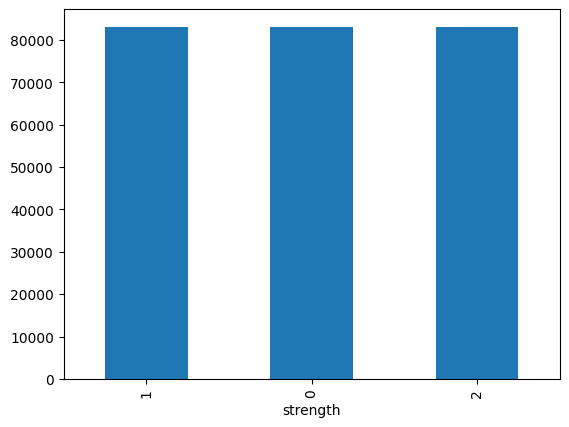

In [15]:
balanced_data['strength'].value_counts().plot(kind='bar')

In [16]:
balanced_data.reset_index()

,index,password,strength
0,255130,sigma5s5,1
1,78411,zaza123mom,1
2,168860,mboihewl45,1
3,496272,krtnkou7,1
4,555596,eljljd5952,1
...,...,...,...
249406,669618,juanpaganini588@gmail.com,2
249407,669619,tYAam8zg3Mg2AZ7a,2
249408,669622,weslley.06888524,2
249409,669627,sakaryal&#305;,2


In [17]:
df = balanced_data
df.head()

,password,strength
255130,sigma5s5,1
78411,zaza123mom,1
168860,mboihewl45,1
496272,krtnkou7,1
555596,eljljd5952,1


In [18]:
def word(password):
    character=[]
    for i in password:
        character.append(i)
    return character

X = np.array(df["password"])
y = np.array(df["strength"])

tfidf = TfidfVectorizer(tokenizer=word, lowercase=False, token_pattern=None)

X = tfidf.fit_transform(X)

In [19]:
counter = Counter(y)
counter

Counter({1: 83137, 0: 83137, 2: 83137})

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [21]:
model = RandomForestClassifier(n_estimators=100, n_jobs=1)
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=1)

In [22]:
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)


In [23]:
print(y_pred[:10])
print(y_pred_train[:10])

[0 2 1 1 0 1 2 2 0 2]
[1 2 1 1 2 0 0 2 1 2]


In [24]:
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)

f1_score_test = f1_score(y_test, y_pred, average='weighted')
f1_score_train = f1_score(y_train, y_pred_train, average='weighted')

precision_test = precision_score(y_test, y_pred, average='weighted')
precision_train = precision_score(y_train, y_pred_train, average='weighted')

recall_test = recall_score(y_test, y_pred, average='weighted')
recall_train = recall_score(y_train, y_pred_train, average='weighted')

print("Test Score: ")
print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)
print("")
print("Train Score: ")
print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

print("")
print("Model 1: ")
print("")
print(classification_report(y_test, y_pred, target_names=["Weak", "Average", "Strong"]))

Test Score: 
Accuracy Test:  0.9605476815748852
F1 score Test:  0.9604264708194715
Precision Test:  0.9607325285879929
Recall Test:  0.9605476815748852

Train Score: 
Accuracy Train:  0.9998646806463253
F1 score Train:  0.9998646806350352
Precision Train:  0.999864727731304
Recall Train:  0.9998646806463253

Model 1: 

              precision    recall  f1-score   support

        Weak       0.94      0.97      0.95     16639
     Average       0.96      0.92      0.94     16673
      Strong       0.98      0.99      0.99     16571

    accuracy                           0.96     49883
   macro avg       0.96      0.96      0.96     49883
weighted avg       0.96      0.96      0.96     49883



### optimization

In [ ]:


# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier

# # Define the corrected parameter grid
# param_grid = {
#     'n_estimators': [100, 200],
#     'max_features': ['sqrt', 'log2'],  # Removed 'auto'
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2],
#     'bootstrap': [True],
#     'criterion': ['gini']
# }

# # Initialize the model
# rf = RandomForestClassifier(random_state=42)

# # Set up the grid search
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
#                            cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# # Fit the grid search to the data
# grid_search.fit(X_train, y_train)

# # Print the best parameters and the corresponding score
# print("Best parameters found: ", grid_search.best_params_)
# print("Best accuracy score: ", grid_search.best_score_)


#### se canceló la optimización, ya que el fit de un modelo tardó 5 mins
lo que supone una combinacion de hyperparams de 108 fits * 5 mins = 9h aprox.